# Sentiment Analysis on Amazon Reviews

## Objective

## Data Description

## Methodology

### Imports

Run the following command in your terminal or command prompt to install all necessary libraries:

```bash
pip install pandas seaborn matplotlib numpy scikit-learn nltk textblob wordcloud

In [19]:
#All the imports are mentioned here:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

# Data cleaning tools
import re
import string

# Removing special characters
import unicodedata

# Removing stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Calculating Polarity and Subjectivity
from textblob import TextBlob

# N-grams
from nltk.util import ngrams

# for Wordscloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load modules
import nltk
import collections

### Step 1: Load & Inspect Data

In [20]:
balanced_data = pd.read_csv('Datasets/balanced_reviews.csv')

In [21]:
balanced_data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length
0,B008COIXOG,AY12DBB0U420B,Gary Peterson,1,1,5,1342310400,Nice Fresh Coconut Taste. Loaded With Potassium.,I just recently visited my nearby Fresh and Ea...,357
1,B004VLVG0C,A1KE5DCWHTAUUX,Gary Anderson,1,1,5,1336867200,Semolina flour for making pasta,This works great I followed the recipe on the...,296
2,B000FL0A9K,AJKN1OQ368JGH,Lynn Benson,0,0,2,1181692800,Too Sweet,Personal preference too sweet Tastes like Gen...,142
3,B0015MY6PC,A2CFYUTWZ3N3FJ,A. Pickett,0,0,5,1244160000,My Daughter Loves These,My daughter loves these snacks She doesnt care...,539
4,B000LTIDR2,A1MG6S9RPWX7C7,Rebeliium,0,0,3,1346976000,Too Much and Too Sweet,I would not recommend buying this product beca...,1331


In [22]:
balanced_data.tail()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,length
124995,B000JOE224,A28EQ06V6ZOMV0,"Nanette Erickson ""An avid reader from Florida""",0,0,5,1272326400,Terrific idea.,I have a cat that can sense a pill in anything...,190
124996,B000WJ6C2O,AC2GDNWF8REFU,mammy,0,0,5,1328918400,Bran Flakes,I was looking for an affordable product to use...,256
124997,B004N8LMFM,A1O80FSHN7HR8F,Derp,3,22,1,1310169600,tasted like plastic. Instructions not readible.,tasted like plastic The texture is so strange ...,292
124998,B000GW257S,A1NL8RB3BHVFKR,Katrina,0,0,1,1323993600,YUK,This stuff taste terrible Just like an artifi...,141
124999,B002QWP89S,A1HZIWB1RGW7RM,Danny Knowles,1,1,5,1319673600,Greenies,These are the best things since sliced bread ...,300


In [23]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               125000 non-null  object
 1   UserId                  125000 non-null  object
 2   ProfileName             124998 non-null  object
 3   HelpfulnessNumerator    125000 non-null  int64 
 4   HelpfulnessDenominator  125000 non-null  int64 
 5   Score                   125000 non-null  int64 
 6   Time                    125000 non-null  int64 
 7   Summary                 124978 non-null  object
 8   Text                    125000 non-null  object
 9   length                  125000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 9.5+ MB


In [24]:
balanced_data.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,length
count,125000.000000,125000.000000,125000.000000,1.250000e+05,125000.000000
mean,1.852448,2.773656,3.000000,1.299249e+09,456.388040
std,7.729888,8.831183,1.414219,4.597147e+07,455.731686
min,0.000000,0.000000,1.000000,9.617184e+08,30.000000
25%,0.000000,0.000000,2.000000,1.278547e+09,189.000000
50%,0.000000,1.000000,3.000000,1.313626e+09,324.000000
75%,2.000000,3.000000,4.000000,1.333411e+09,561.000000
max,844.000000,923.000000,5.000000,1.351210e+09,20560.000000


In [25]:
balanced_data.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'length'],
      dtype='object')

In [26]:
balanced_data['Text']

0         I just recently visited my nearby Fresh and Ea...
1         This works great  I followed the recipe on the...
2         Personal preference too sweet  Tastes like Gen...
3         My daughter loves these snacks She doesnt care...
4         I would not recommend buying this product beca...
                                ...                        
124995    I have a cat that can sense a pill in anything...
124996    I was looking for an affordable product to use...
124997    tasted like plastic The texture is so strange ...
124998    This stuff taste terrible  Just like an artifi...
124999    These are the best things since sliced bread  ...
Name: Text, Length: 125000, dtype: object

### Step 2: Data Cleaning

#### Drop Unnecesary Columns

In [27]:
# List of columns to drop
columns_to_drop = ['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 
                   'HelpfulnessDenominator', 'Time', 'Summary', 'length']

# Drop the specified columns
balanced_data = balanced_data.drop(columns=columns_to_drop)

# Display the updated DataFrame
balanced_data.head()

,Score,Text
0,5,I just recently visited my nearby Fresh and Ea...
1,5,This works great I followed the recipe on the...
2,2,Personal preference too sweet Tastes like Gen...
3,5,My daughter loves these snacks She doesnt care...
4,3,I would not recommend buying this product beca...


In [28]:
# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

balanced_data['Text'] = balanced_data['Text'].apply(punctuation_removal)

In [31]:
import re

# Function to remove numbers from reviews
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search(r'\d', i):  # Use raw string for regex
            list_text_new.append(i)
    return ''.join(list_text_new)

# Apply the function to the "Text" column
balanced_data['Text'] = balanced_data['Text'].apply(drop_numbers)


In [32]:
balanced_data['Text'].head(10)

0    I just recently visited my nearby Fresh and Ea...
1    This works great  I followed the recipe on the...
2    Personal preference too sweet  Tastes like Gen...
3    My daughter loves these snacks She doesnt care...
4    I would not recommend buying this product beca...
5    Illy medium roast is one the best ground coffe...
6    I ordered this for some time but have recently...
7    packaged cheese  what a great idea add monosod...
8    We can no longer drink coffee and husband cant...
9    My big puppy is not impressed Hell ignore a pa...
Name: Text, dtype: object

/var/folders/2q/34gy_yqs79q2pmyt_q5t689h0000gn/T/ipykernel_2216/2558911142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=balanced_data , palette='viridis')


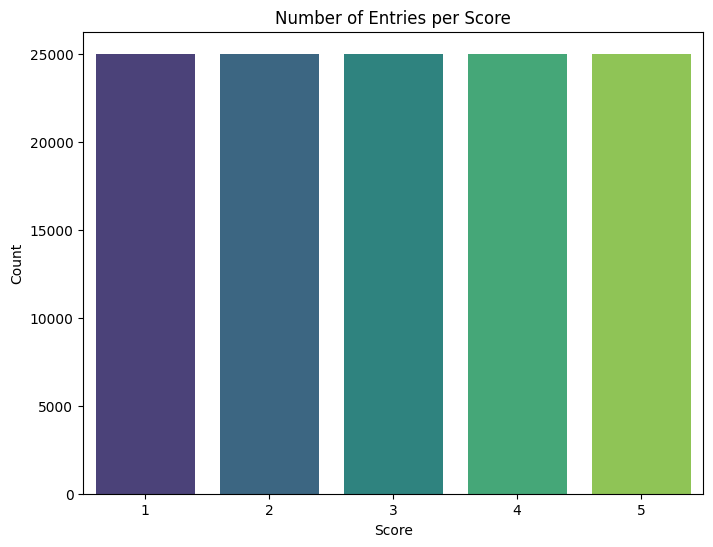

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=balanced_data , palette='viridis')
plt.title('Number of Entries per Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [38]:
# Define a function to classify scores
def classify_score(score):
    if score in [4, 5]:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    elif score in [1, 2]:
        return 'Negative'

# Apply the function to create a new column
balanced_data['Sentiment'] = balanced_data['Score'].apply(classify_score)

# Display the updated DataFrame
print(balanced_data.head())

   Score                                               Text Sentiment
0      5  I just recently visited my nearby Fresh and Ea...  Positive
1      5  This works great  I followed the recipe on the...  Positive
2      2  Personal preference too sweet  Tastes like Gen...  Negative
3      5  My daughter loves these snacks She doesnt care...  Positive
4      3  I would not recommend buying this product beca...   Neutral


In [39]:
balanced_data.shape

(125000, 3)